In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from scipy.stats import zscore

import warnings
warnings.filterwarnings('ignore')

# Micro-Credit-Project

In this project we have details of cutomers to improve the selection of customers for the credit:

1. Build a model which can be used to predict in terms of a probability for each loan transaction.
2. Whether the customer will be paying back the loaned amount within 5 days of issuance of loan.
3. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

# Data file details





   Variable = Definition

1. label = Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success,0:failure}.
2. msisdn = mobile number of user.
3. aon = age on cellular network in days.
4. daily_decr30 = Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah).
5. daily_decr90 = Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah).
6. rental30 = Average main account balance over last 30 days.
7. rental90 = Average main account balance over last 90 days.
8. last_rech_date_ma = Number of days till last recharge of main account.
9. last_rech_date_da = Number of days till last recharge of data account.
10. last_rech_amt_ma = Amount of last recharge of main account (in Indonesian Rupiah).
11. cnt_ma_rech30 = Number of times main account got recharged in last 30 days.
12. fr_ma_rech30 = Frequency of main account recharged in last 30 days.
13. sumamnt_ma_rech30 = Total amount of recharge in main account over last 30 days (in Indonesian Rupiah.
14. medianamnt_ma_rech30 = Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah).
15. medianmarechprebal30 = Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah).
16. cnt_ma_rech90 = Number of times main account got recharged in last 90 days.
17. fr_ma_rech90 = Frequency of main account recharged in last 90 days.
18. sumamnt_ma_rech90 = Total amount of recharge in main account over last 90 days (in Indonesian Rupee
19. medianamnt_ma_rech90 = Median of amount of recharges done in main account over last 90 days at user level (in Indonesian Rupee).
20. medianmarechprebal90 = Median of main account balance just before recharge in last 90 days at user level (in Indonesian Rupee).
21. cnt_da_rech30 = Number of times data account got recharged in last 30 days.
22. fr_da_rech30 = Frequency of data account recharged in last 30 days.
23. cnt_da_rech90 = Number of times data account got recharged in last 90 days.
24. fr_da_rech90 = Frequency of data account recharged in last 90 days.
25. cnt_loans30 = Number of loans taken by user in last 30 days.
26. amnt_loans30 = Total amount of loans taken by user in last 30 days.
27. maxamnt_loans30 = maximum amount of loan taken by the user in last 30 days.
28. medianamnt_loans30 = Median of amounts of loan taken by the user in last 30 days.
29. cnt_loans90 = Number of loans taken by user in last 90 days.
30. amnt_loans90 = Total amount of loans taken by user in last 90 days.
31. maxamnt_loans90 = maximum amount of loan taken by the user in last 90 days.
32. medianamnt_loans90 = Median of amounts of loan taken by the user in last 90 days.
33. payback30 = Average payback time in days over last 30 days.
34. payback90 = Average payback time in days over last 90 days.
35. pcircle = telecom circle.
36. pdate = date.

# Data Preprocessing

In [2]:
# Reading the data file.

df=pd.read_csv('Data file.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


# EDA - Exploratory Data Analysis

In [3]:
# displaying information regarding the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [4]:
# Checking uniqueness
df['pcircle'].value_counts()


UPW    209593
Name: pcircle, dtype: int64

In [5]:
df.pcircle.unique()

array(['UPW'], dtype=object)

# Observations:

    1. Unnamed column can be dropped as it is not necessary for prediction of loan repayment.
    2. Also column pcircle can be dropped as it is not necessary for prediction of loan repayment.
    3. Column msisdn and pdate are of type object which needs to be convered to float/date type.

In [6]:
# dropping Unnamed:0 and pcircle columns

df.drop(['Unnamed: 0','pcircle'], axis=1, inplace=True)
df.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


In [7]:
df.shape

(209593, 35)

In [8]:
# Change data type of msisdn and pdate

df['pdate'].replace(to_replace='[-]', value='', regex=True, inplace=True)
df['pdate'] = pd.to_numeric(df['pdate'])

df.head()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20160720
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,20160810
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,20160819
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,20160606
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,20160622


In [9]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df['msisdn'] = le.fit_transform(df['msisdn'])
df.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20160720
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,20160810
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,20160819
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,20160606
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,20160622


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int32  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [11]:
Total = df.shape[0]
print("Total: ",Total)

loan_Success = df[df['label'] == 1]
loan_Failure = df[df['label'] == 0]

x = len(loan_Failure)/Total
y = len(loan_Success)/Total

print('Loan Success :',len(loan_Failure))
print('Loan Success :',len(loan_Success))


print('Loan Success :',x*100,'%')
print('Loan Failure :',y*100,'%')

Total:  209593
Loan Success : 26162
Loan Success : 183431
Loan Success : 12.482287099282896 %
Loan Failure : 87.5177129007171 %


Text(0, 0.5, 'Frequency')

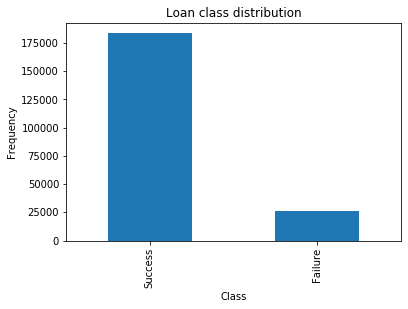

In [12]:
# Let's plot the Transaction class against the Frequency
labels = ['Success','Failure']
classes = pd.value_counts(df['label'], sort = True)
#classes.plot(kind = 'bar', rot=0)
classes.plot(kind = 'bar')
plt.title("Loan class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

In [13]:
# using isnull() function   
if df.isnull() is True:
    print("Null is present")
else:
    print("Null is NOT present")
    
#df.isnull() 

Null is NOT present


In [14]:
if df.duplicated() is True:
    print("Rows duplicated")
else:
    print("NO duplicates")


NO duplicates


In [15]:
# Checking which all columns have null values
df.isnull().sum().sort_values(ascending=False)

pdate                   0
last_rech_date_da       0
medianmarechprebal30    0
medianamnt_ma_rech30    0
sumamnt_ma_rech30       0
fr_ma_rech30            0
cnt_ma_rech30           0
last_rech_amt_ma        0
last_rech_date_ma       0
fr_ma_rech90            0
rental90                0
rental30                0
daily_decr90            0
daily_decr30            0
aon                     0
msisdn                  0
cnt_ma_rech90           0
sumamnt_ma_rech90       0
payback90               0
maxamnt_loans30         0
payback30               0
medianamnt_loans90      0
maxamnt_loans90         0
amnt_loans90            0
cnt_loans90             0
medianamnt_loans30      0
amnt_loans30            0
medianamnt_ma_rech90    0
cnt_loans30             0
fr_da_rech90            0
cnt_da_rech90           0
fr_da_rech30            0
cnt_da_rech30           0
medianmarechprebal90    0
label                   0
dtype: int64

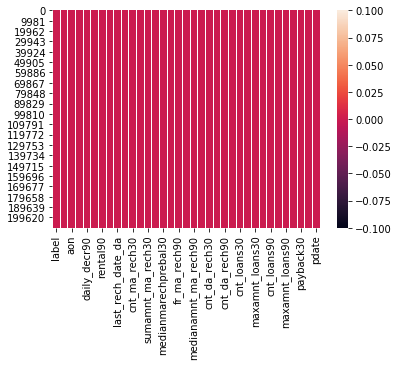

In [16]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

In [17]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,2.095930e+05
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,2.016069e+07
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,7.247639e+01
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.016060e+07
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,2.016062e+07
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,2.016071e+07
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,2.016073e+07
max,1.000000,186242.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,2.016082e+07


In [18]:
#sns.pairplot(df)

In [19]:
# collist=df.columns.values
# ncol=12
# nrows=10


In [20]:
# plt.figure(figsize=(ncol,5*ncol))

# for i in range(1,len(collist)):
#     plt.subplot(nrows,ncol,i+1)
#     sns.boxplot(df[collist[i]],color='green',orient='v')
#     plt.tight_layout()

label                      AxesSubplot(0.125,0.772143;0.110714x0.107857)
msisdn                  AxesSubplot(0.257857,0.772143;0.110714x0.107857)
aon                     AxesSubplot(0.390714,0.772143;0.110714x0.107857)
daily_decr30            AxesSubplot(0.523571,0.772143;0.110714x0.107857)
daily_decr90            AxesSubplot(0.656429,0.772143;0.110714x0.107857)
rental30                AxesSubplot(0.789286,0.772143;0.110714x0.107857)
rental90                   AxesSubplot(0.125,0.642714;0.110714x0.107857)
last_rech_date_ma       AxesSubplot(0.257857,0.642714;0.110714x0.107857)
last_rech_date_da       AxesSubplot(0.390714,0.642714;0.110714x0.107857)
last_rech_amt_ma        AxesSubplot(0.523571,0.642714;0.110714x0.107857)
cnt_ma_rech30           AxesSubplot(0.656429,0.642714;0.110714x0.107857)
fr_ma_rech30            AxesSubplot(0.789286,0.642714;0.110714x0.107857)
sumamnt_ma_rech30          AxesSubplot(0.125,0.513286;0.110714x0.107857)
medianamnt_ma_rech30    AxesSubplot(0.257857,0.5132

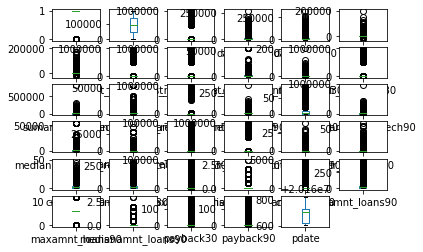

In [21]:
#df.plot(figsize=(7,5));
df.plot(kind='box', subplots=True, layout=(6,6))

# Observations:
    
1. The data is 
 

In [22]:
# Checking the zscore in order to normalize the data.
from scipy.stats import zscore
z= np.abs(zscore(df))
z

array([[2.64789583, 0.984213  , 0.10357685, ..., 2.9046997 , 2.39409346,
        0.35692966],
       [0.37765836, 0.91502744, 0.09776412, ..., 0.38562959, 0.41923266,
        1.59871626],
       [0.37765836, 1.10692885, 0.10010243, ..., 0.38562959, 0.41923266,
        1.72289491],
       ...,
       [0.37765836, 0.7274342 , 0.09378769, ..., 0.06820893, 0.04735622,
        0.48110832],
       [0.37765836, 0.34017702, 0.08428915, ..., 0.38562959, 0.59938541,
        0.4259178 ],
       [0.37765836, 0.52386948, 0.08628398, ..., 0.38562959, 0.41923266,
        0.17756048]])

In [23]:
# Verifying for the presence of zscore value of data with threshold of more than 3 std score.

threshold=3
print(np.where(z>3))

(array([    21,     22,     22, ..., 209586, 209587, 209587], dtype=int64), array([16, 16, 33, ..., 29, 27, 31], dtype=int64))


In [24]:
# Removing the outliers having zscore value of more than 3.
loan_data=df[(z<3).all(axis=1)]
loan_data.shape

(161465, 35)

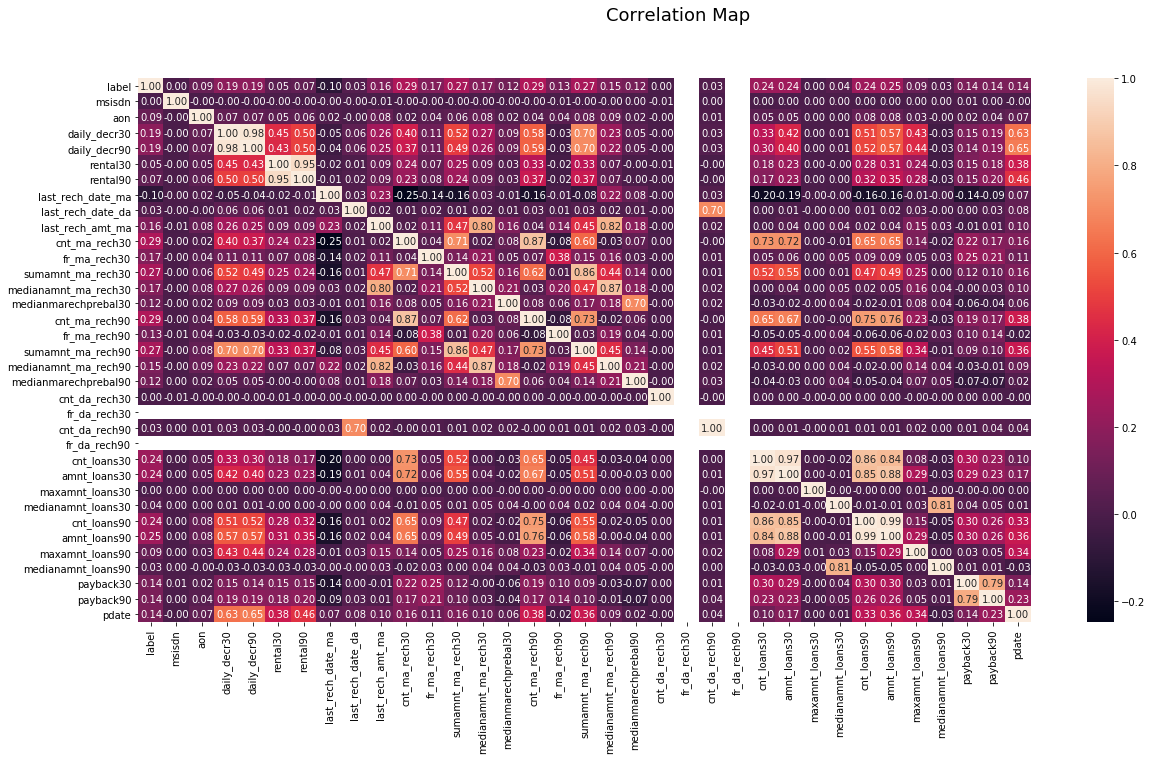

In [25]:
plt.figure(figsize=(20,10)) 
sns.heatmap(loan_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

# Observations:

1. Post removal of data based on zscore the data count is 161465 compared to original 209593.
2. New dataframe loan_data is created after removing the outliers using zscore.
3. Need to remove columns fr_da_rech30 & fr_da_rech90 from the loan_data dataset as they are not related anymore.

In [26]:
#Dropping columns fr_da_rech30 & fr_da_rech90 from the loan_data dataset.
loan_data.drop(['fr_da_rech30','fr_da_rech90'], axis=1, inplace=True)

In [27]:
loan_data.skew()

label                   -2.090315
msisdn                  -0.000215
aon                      0.957902
daily_decr30             1.963747
daily_decr90             2.077637
rental30                 2.194889
rental90                 2.244866
last_rech_date_ma        3.099484
last_rech_date_da       10.384887
last_rech_amt_ma         2.125356
cnt_ma_rech30            1.175157
fr_ma_rech30             2.005139
sumamnt_ma_rech30        1.634226
medianamnt_ma_rech30     2.326312
medianmarechprebal30    10.538891
cnt_ma_rech90            1.321145
fr_ma_rech90             1.985567
sumamnt_ma_rech90        1.707309
medianamnt_ma_rech90     2.373140
medianmarechprebal90     3.692650
cnt_da_rech30           50.760988
cnt_da_rech90            6.934340
cnt_loans30              1.465414
amnt_loans30             1.441450
maxamnt_loans30         53.470571
medianamnt_loans30       5.355423
cnt_loans90              1.708977
amnt_loans90             1.695156
maxamnt_loans90          2.680929
medianamnt_loa

In [28]:
cols=['msisdn', 'aon', 'daily_decr30', 'daily_decr90', 'rental30',
       'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'cnt_da_rech90', 'cnt_loans30', 'amnt_loans30', 'maxamnt_loans30',
       'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90', 'maxamnt_loans90',
       'medianamnt_loans90', 'payback30', 'payback90', 'pdate']

In [29]:
# Reducing the skewness with boxcox1p in order to avoid 0 encountered as negative while transformation.

from scipy.special import boxcox1p
#from scipy.special import boxcox
# 0 -> log transform
# .5 -> square root transform

#for i in cols:
#    loan_data[i]=boxcox1p(loan_data[i],0)


#loan_data.skew()

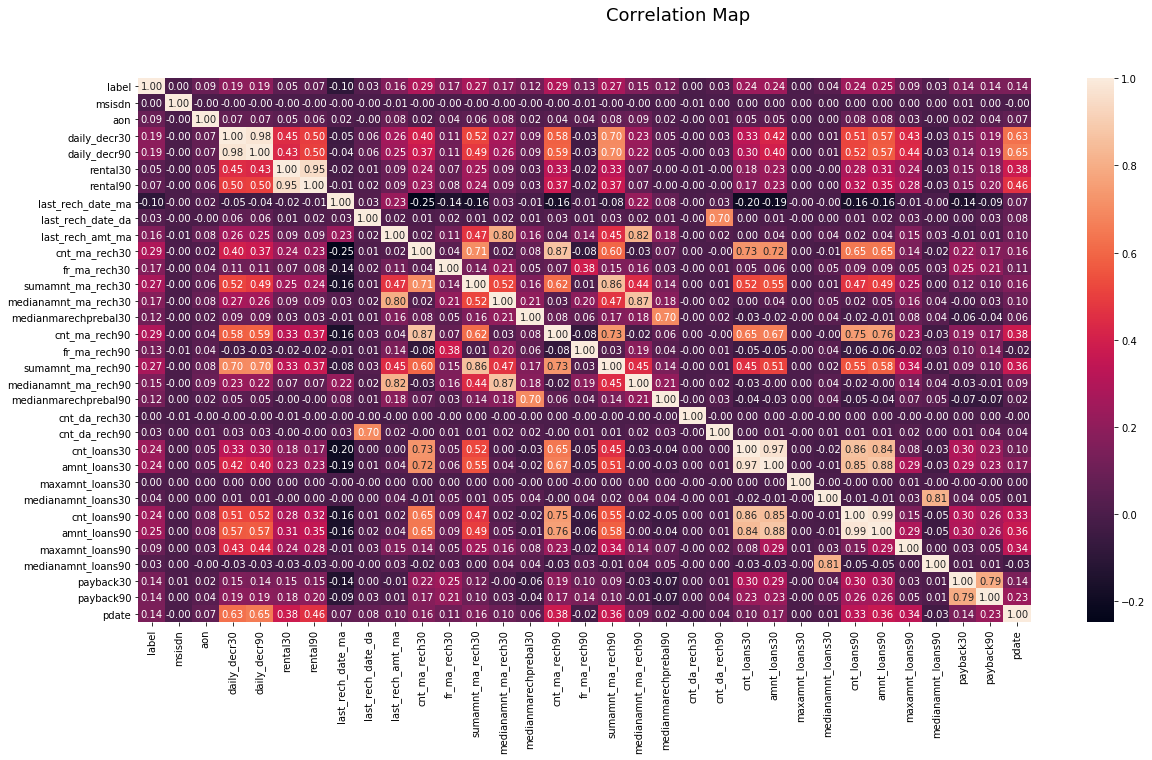

In [30]:
plt.figure(figsize=(20,10)) 
sns.heatmap(loan_data.corr(), annot=True, fmt=".2f") 
plt.suptitle("Correlation Map", fontsize=18)
plt.show()  

In [31]:
# Setting x by excluding label column which is y here
x=loan_data.drop(['label'],axis=1)
x.head(5)

,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,20160720
1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,20160810
2,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,20160819
3,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,20160606
4,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,20160622


In [32]:
# pca=PCA(n_components=10)
# x=pca.fit_transform(x)

# pd.DataFrame(data=x)

In [33]:
from sklearn.preprocessing import StandardScaler
#from sklearn.preprocessing import MinMaxScaler

scale = StandardScaler()
x=scale.fit_transform(x)

In [34]:
# Target variable is label

y=loan_data['label']
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 161465, dtype: int64

In [35]:
max_acc_score=0
for r_state in range(42,101):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=r_state)
    lg=LogisticRegression()
    lg.fit(train_x,train_y)
    pred=lg.predict(test_x)
    accuracyScore=accuracy_score(test_y,pred)
    #print("Accuracy_Score corresponding to r_state: ",r_state," is ",accuracyScore)
    if(accuracyScore>max_acc_score):
        max_acc_score=accuracyScore
        final_rstate=r_state
       
print("Max_accuracy_Score corresponding to final_r_state: ",final_rstate," is ",max_acc_score)

Max_accuracy_Score corresponding to final_r_state:  55  is  0.8675898630069115


In [36]:
# Setting the test x & y values and using the random state from above step.
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=.25,random_state=55)

In [37]:
train_x.shape

(121098, 32)

In [38]:
train_y.shape

(121098,)

In [39]:
test_x.shape

(40367, 32)

In [40]:
test_y.shape

(40367,)

# Predicting Best Parameters using GridSearch

In [41]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [42]:
# from sklearn.model_selection import GridSearchCV


# #parameters for SVC
# #params_svc={'kernel':('linear','rbf'), 'C':[1,10]}

# #parameter for KNN
# #params_knn={'n_neighbors':np.arange(5,20)}

# #parameters for DTC
# params_dtc={'criterion':('gini', 'entropy'), 'max_depth':(4,6,8,12)}   

# #parameters for RFC,ADA,GBC
# params={'n_estimators':[100,500],'random_state':[10,100]}

    
# #svc=GridSearchCV(SVC(),params_svc)
# #svc.fit(train_x,train_y)
# #print("Best parameters for Support Vector Classification:",svc.best_params_)

# #knn= GridSearchCV(KNeighborsClassifier(),param_grid=params_knn)
# #knn.fit(train_x,train_y)
# #print("Best parameters for KNeighborsClassifier",grid.best_params_)


# dtc= GridSearchCV(DecisionTreeClassifier(),param_grid=params_dtc,cv=10,scoring='accuracy')
# dtc.fit(train_x,train_y)
# print("Best parameters for DecisionTreeClassifier",dtc.best_params_)

# rfc= GridSearchCV(RandomForestClassifier(),param_grid=params,scoring='accuracy')
# rfc.fit(train_x,train_y)
# print("Best parameters for RandomForestClassifier: ",rfc.best_params_)

# #ada= GridSearchCV(AdaBoostClassifier(),param_grid=params,scoring='accuracy')
# #ada.fit(train_x,train_y)
# #print("Best parameters for AdaBoostClassifier: ",ada.best_params_)


# gbc= GridSearchCV(GradientBoostingClassifier(),param_grid=params,scoring='accuracy')
# gbc.fit(train_x,train_y)
# print("Best parameters for GradientBoostingClassifier: ",gbc.best_params_)


In [43]:
#KNN=KNeighborsClassifier(n_neighbors=10)
LR=LogisticRegression()
DT=DecisionTreeClassifier(criterion='gini',max_depth=8)
#GNB=GaussianNB()
RFC=RandomForestClassifier(n_estimators=100,random_state=100)
#ADC=AdaBoostClassifier(n_estimators=100,random_state=10)
GBC=GradientBoostingClassifier(n_estimators=100,random_state=100)

In [44]:
models=[]
# #models.append(('KNeighborsClassifier',KNN))
models.append(('LogisticRegression',LR))
models.append(('DecisionTreeClassifier',DT))
# #models.append(('GaussianNB',GNB))
models.append(('RandomForestClassifier',RFC))
# #models.append(('AdaBoostClassifier',ADC))
models.append(('GradientBoostingClassifier',GBC))

In [ ]:
Model=[]
score=[]
f1=[]
rocscore=[]

for name,model in models:
    print("--------------",name,"--------------")
    #print("\n")
    Model.append(name)
    model.fit(train_x,train_y)
    print(model)
    pre=model.predict(test_x)
    AS=accuracy_score(test_y,pre)
    print("Accuracy Score: ", AS)
    score.append(AS*100)
    sc=cross_val_score(model,x,y,cv=10,scoring='f1_macro')
    print("F-1_Score: ", sc)
    #f1=sc.mean()
    f1.append(sc.mean())
    print("F-1 Mean score= ",sc.mean())
    print("Classification Report:\n\n",classification_report(test_y,pred))
    
    false_positive_rate,true_positive_rate,threshold=roc_curve(test_y,pre)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print("ROC_AUC_Score= ",roc_auc)
    rocscore.append(roc_auc*100)
    cm=confusion_matrix(test_y,pre)
    print("Confusion Matrix: \n",cm)
    print("\n\n")

-------------- LogisticRegression --------------
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Accuracy Score:  0.8675898630069115
F-1_Score:  [0.54544548 0.5366718  0.5418246  0.54922781 0.55113869 0.54196753
 0.54536348 0.53582899 0.54615048 0.54481922]
F-1 Mean score=  0.5438438095355528
Classification Report:

               precision    recall  f1-score   support

           0       0.13      0.02      0.04      5489
           1       0.86      0.98      0.92     34878

    accuracy                           0.85     40367
   macro avg       0.50      0.50      0.48     40367
weighted avg       0.76      0.85      0.80     40367

ROC_AUC_Score=  0.5434356010604844
Confusion Matrix: 
 [[  539  4950]
 [  39

In [ ]:
result=pd.DataFrame({"Model": Model, "Score": score, "F1-score": f1, "ROC_AUC_Score":rocscore })
result